In [1]:
import numpy as np
from ATDetector import ATDetector
import cv2
from time import sleep
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Information about the camera we are using
camera = {}
#Camera Intrinsic Matrix (3x3)
camera["K"] = np.array(
    [[631.6058624841243, 0.0, 673.9002987027918], [0.0, 627.4303222760955, 380.85431690312384], [0.0, 0.0, 1.0]])
#Fisheye Camera Distortion Matrix
camera["D"] = np.array(
    [[-0.031080677599846774], [-0.006061559072085696], [-0.0011641369792770276], [0.00028577486827623653]])
camera["fisheye"] = True
camera["flipped"] = True
#Rotation Matrix from World to Camera Frame if Camera is Flipped
camera["flip_correction"]=np.array([[-1.,0.,0.],[0.,-1.,0.],[0.,0.,1.]])
camera["res"] = (1280, 760)
#fx,fy,cx,cy from K
camera["params"] = [631.605, 627.43, 673.9, 380.85]

In [3]:
#Scale Factor for Showing Images
SCALE=.3
#Information about the Tags
tags = {}
#To add more families, seperate with a space instead of using a list
families = "tagStandard52h13"
#Size of Tag in Meters
tag_size = .04


In [4]:
#Create Detector
detect=ATDetector(families,tag_size,camera)

In [ ]:
#Predetermined Tag Locations, where two tags are 10 inches apart from each other on a flat table
tag_locations={}
tag_locations[4]=np.array([[.127],[0.],[0.]])
tag_locations[3]=np.array([[-.127],[0.],[0.]])
fname="Images/two_tags_pose.png"
detect.estimate_image_pose(fname,tag_locations)


> c:\users\ted\desktop\race_on\race_on_cv\atdetector.py(55)estimate_image_pose()
     53             pose=tag.pose_t
     54             import pdb;pdb.set_trace()
---> 55             if self.camera["flipped"]:
     56                 pose = np.matmul(self.camera["flip_correction"], tag.pose_t)
     57             tag_id=tag.tag_id

ipdb> ta
*** NameError: name 'ta' is not defined
ipdb> tag
Detection object:
tag_family = b'tagStandard52h13'
tag_id = 3
hamming = 0
decision_margin = 63.89543533325195
homography = [[-9.85648068e+00  4.80465856e+00  8.09144549e+02]
 [ 1.75388709e+00 -1.01111610e+01  4.44065028e+02]
 [ 3.87699399e-03  5.95702527e-03  1.00000000e+00]]
center = [809.14454867 444.06502798]
corners = [[822.09570312 431.30285645]
 [796.26226807 431.46472168]
 [796.1394043  456.88040161]
 [822.28271484 456.9156189 ]]
pose_R = [[-0.99631909 -0.01053795  0.08507189]
 [ 0.00803143 -0.99952504 -0.02975221]
 [ 0.08534501 -0.02895945  0.99593051]]
pose_t = [[0.21058854]
 [0.09919716]
 

In [6]:
#Overlay detections on the Image
detect.visualize_image_detections(fname)

In [17]:
fname="Videos/x_and_z_2.h264"
#Get Locations for each frame
poses=detect.estimate_video_pose(fname,tag_locations,show_animation=False)

In [14]:
#Overlay detections on the Video
detect.visualize_video_detections(fname)

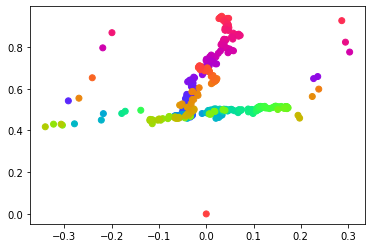

In [18]:

plt.figure()
#Create Color Wheel
phi = np.linspace(0, 2*np.pi, poses.shape[1])
x = np.sin(phi)
y = np.cos(phi)
rgb_cycle = np.vstack((           
    .5*(1.+np.cos(phi)), 
    .5*(1.+np.cos(phi+2*np.pi/3)), 
    .5*(1.+np.cos(phi-2*np.pi/3)))).T 
#Animation Loop
for i in range(poses.shape[1]):
    plt.scatter(poses[0,:i],poses[2,:i],c=rgb_cycle[:i])
    plt.show()
    sleep(0.1)
    clear_output(wait=True)